In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

##import KMeans from sklearn
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
df  = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
print(len(df)) #reprents the total no.of customer whose data we are having

200


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**There are no null values**

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


from the above describe() the **count** row shows that we have a total of 200 rows along with mean, std, min , max value of all the columns, 

In [8]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


# EDA

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**ANNUAL INCOME DISTRIBUTION**

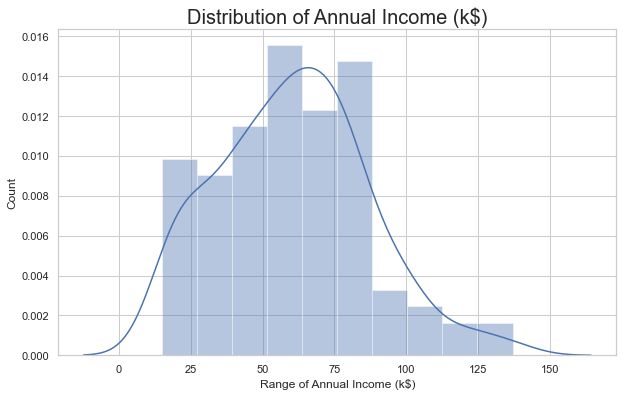

In [10]:
#Distribution of Annnual Income
plt.figure(figsize = (10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

**AGE DISTRIBUTION**

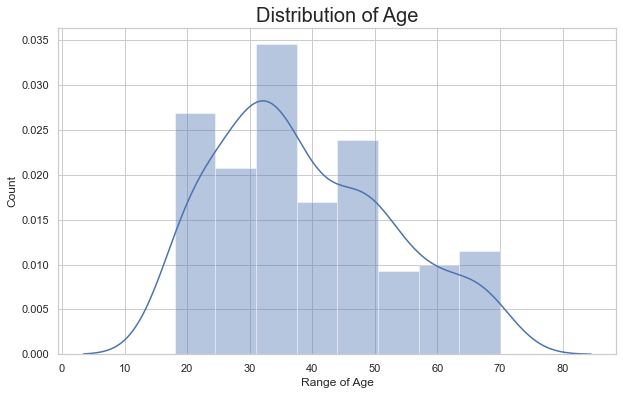

In [11]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title("Distribution of Age", fontsize = 20)
plt.xlabel("Range of Age")
plt.ylabel("Count")
plt.show()

**SPENDING SCORE DISTRIBUTION:**

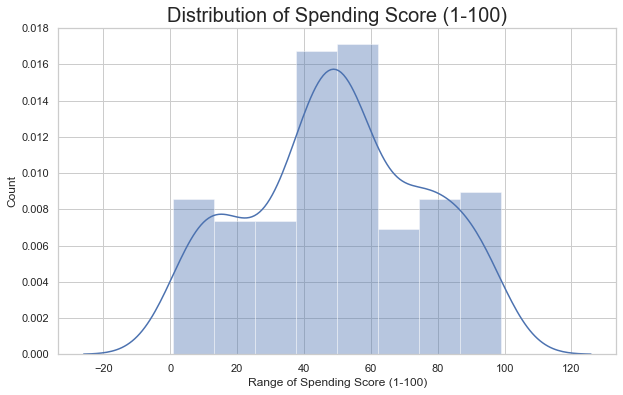

In [12]:
plt.figure(figsize = (10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

**The maximum range of Spending Score is 40-60**

**GENDER ANALYSIS**

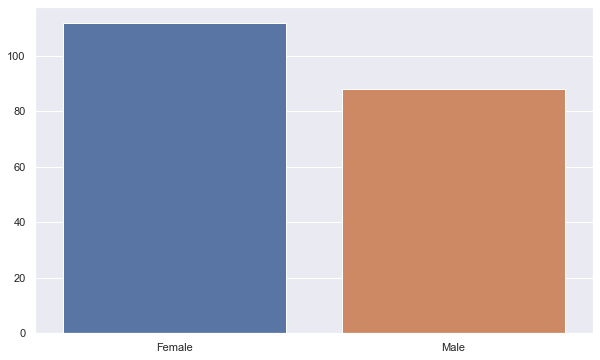

In [13]:
genders = df.Gender.value_counts()
sns.set(style = "darkgrid")
plt.figure(figsize = (10,6))
sns.barplot(x = genders.index, y = genders.values)
plt.show()

from the above plot it is clear that more female visit the Mall than male

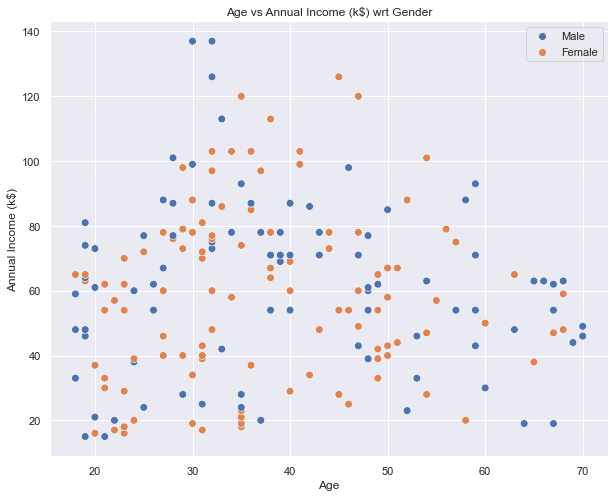

In [14]:
plt.figure(figsize = (10,8))
sns.scatterplot(x ="Age", y ="Annual Income (k$)", hue ="Gender", data =df, s=60)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Age vs Annual Income (k$) wrt Gender")
plt.legend()
plt.show()

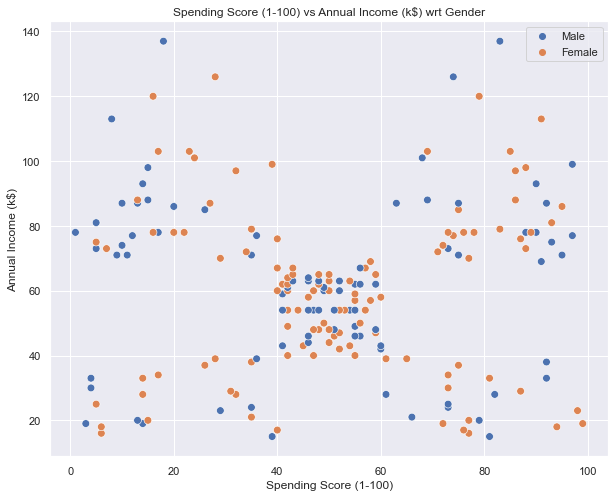

In [15]:
plt.figure(figsize = (10,8))
sns.scatterplot(x ="Spending Score (1-100)", y ="Annual Income (k$)", hue ="Gender", data =df, s=60)
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.title("Spending Score (1-100) vs Annual Income (k$) wrt Gender")
plt.legend()
plt.show()

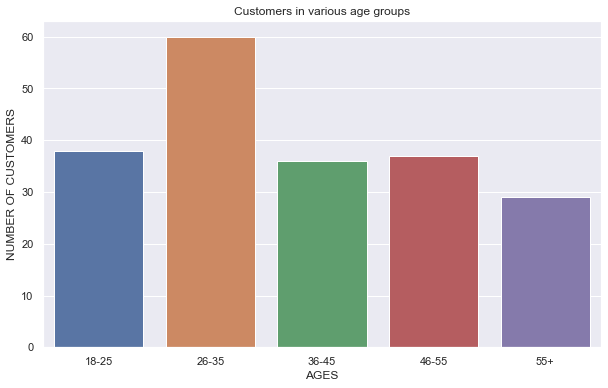

In [16]:
#Creating buckets
## Age buckets
Age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
Age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
Age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
Age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
Age55above = df.Age[(df.Age >= 56)]

x = ["18-25","26-35", "36-45", "46-55", "55+"]
y = [len(Age18_25.values), len(Age26_35.values), len(Age36_45.values), len(Age46_55.values), len(Age55above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.xlabel("AGES")
plt.ylabel("NUMBER OF CUSTOMERS")
plt.title("Customers in various age groups")
plt.show()

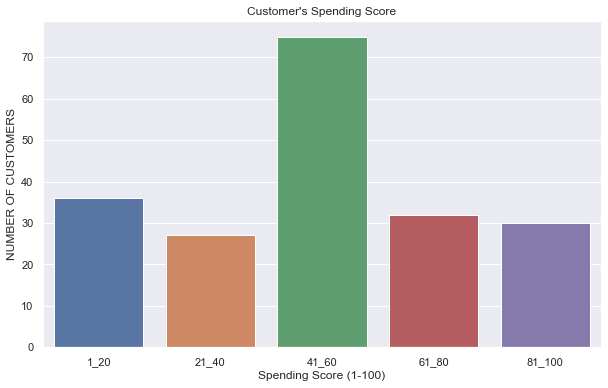

In [17]:
## Spending Score Buckets
spsc1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
spsc21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=21) & (df["Spending Score (1-100)"] <= 40)]
spsc41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=41) & (df["Spending Score (1-100)"] <= 60)]
spsc61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=61) & (df["Spending Score (1-100)"] <= 80)]
spsc81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=81) & (df["Spending Score (1-100)"] <= 100)]

x = ["1_20","21_40", "41_60", "61_80", "81_100"]
y = [len(spsc1_20.values), len(spsc21_40.values), len(spsc41_60.values), len(spsc61_80.values), len(spsc81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.xlabel("Spending Score (1-100)")
plt.ylabel("NUMBER OF CUSTOMERS")
plt.title("Customer's Spending Score")
plt.show()



In [18]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [19]:
df[['Annual Income (k$)']]

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17
...,...
195,120
196,126
197,126
198,137


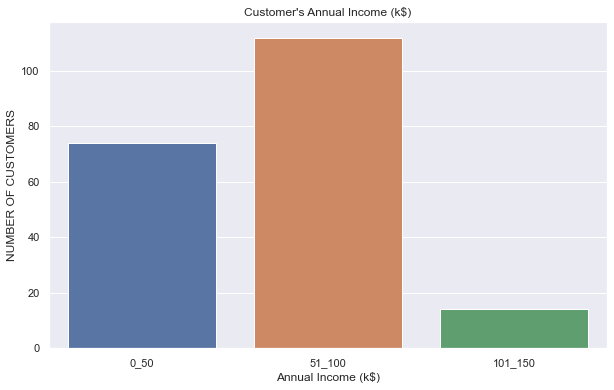

In [20]:
AI0_50 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 50)]
AI51_100 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 51) & (df["Annual Income (k$)"] <= 100)]
AI101_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 101) & (df["Annual Income (k$)"] <= 150)]

x = ["0_50", "51_100","101_150"]
y = [len(AI0_50.values), len(AI51_100.values), len(AI101_150.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.xlabel("Annual Income (k$)")
plt.ylabel("NUMBER OF CUSTOMERS")
plt.title("Customer's Annual Income (k$)")
plt.show()


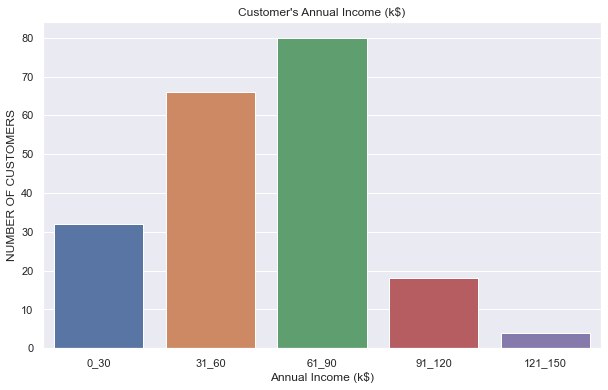

In [21]:
AI0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
AI31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
AI61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
AI91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
AI121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

x = ["0_30", "31_60","61_90", "91_120", "121_150"]
y = [len(AI0_30.values), len(AI31_60.values), len(AI61_90.values),len(AI91_120.values),len(AI121_150.values) ]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.xlabel("Annual Income (k$)")
plt.ylabel("NUMBER OF CUSTOMERS")
plt.title("Customer's Annual Income (k$)")
plt.show()


# CLUSTERING 

**CLUSTERING BASED ON 2 FEATURES**
- *I have used 2 features that are annual income and spending scores*

In [22]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [23]:
df1 = df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]
X = df1[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


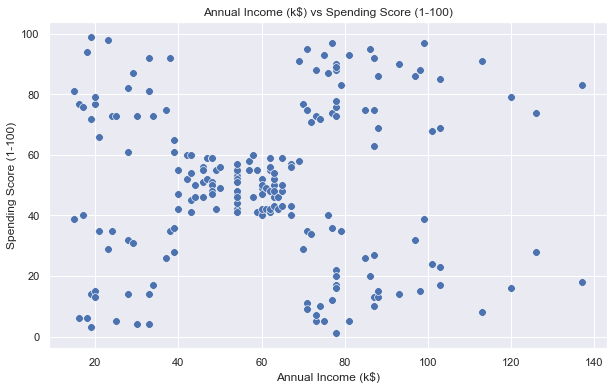

In [24]:
## Let's do some analysis usingscatter plot

plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=X, s=60)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.show()

## APPLYING KMEANS

Within Cluster Sum of Squared Errors (WSS) is a metric commonly used to evaluate the quality of clustering algorithms, such as k-means, for different values of the number of clusters (k). WSS measures the sum of squared distances between each data point and its assigned cluster centroid. It is used to find an optimal value of k, which represents the number of clusters that result in the least variation within each cluster.

we will get Elbow chart

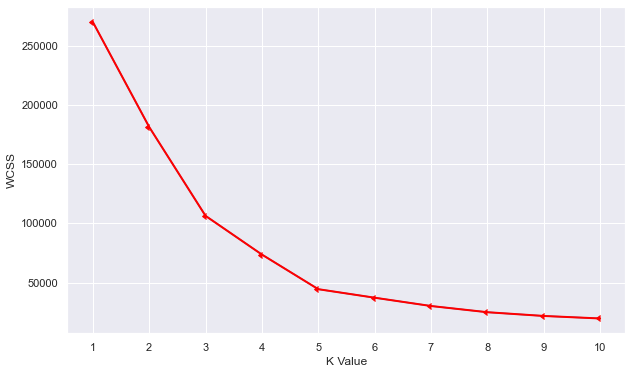

In [25]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
    
# the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth=2, color='red', marker=8)
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

- This elbow chart  helps us finding the clusters
- The above graph is called **elbow graph**, from the graph we have **K value** which is the **number of clusters** in **x axis**, number of cluster is taken at the elbow joint point, this is the pont where the wcss point stops decreasing, from the graph this value is 5, at this point the wcss value is decreasing but is minimal, so we can taken 5 clusters and proceed

In [26]:
## Taking 5 clusters
km1 = KMeans(n_clusters=5)
    
# fitting the input data 
km1.fit(X)
    
## Predicting the labels of input data
y = km1.predict(X)
## adding the "label" to column by name "label"  
df1["label"] = y
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


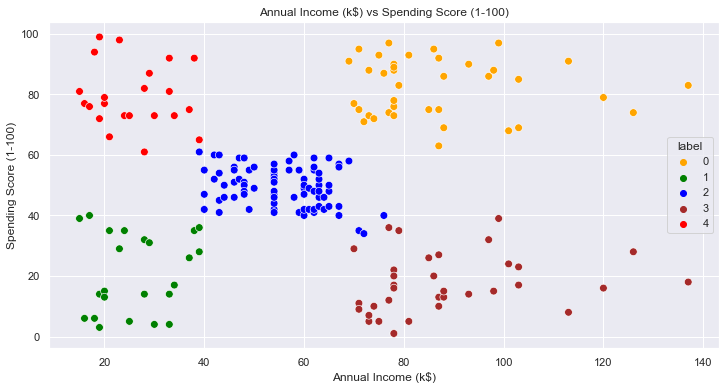

In [27]:
## Scatter plot for cluster
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue='label', palette=["orange", "green", "blue", "brown", "red"], legend='full', data=df1, s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()

so we have formed 5 different clusters, the red cluster represents customer with lowest income and lowest spending score, cluster with green color have customers with highest income and spending score

Printing the customer IDs according to groups

In [28]:
C1 = df1[df1["label"] == 1]
print("Number of customer in 1st group=", len(C1))
print("They are -", C1["CustomerID"].values)
print("---------------------------------------------------------------------------------------------")

C2 = df1[df1["label"] == 0]
print("Number of customer in 2nd group=", len(C2))
print("They are -", C1["CustomerID"].values)
print("---------------------------------------------------------------------------------------------")

C3 = df1[df1["label"] == 2]
print("Number of customer in 1st group=", len(C3))
print("They are -", C3["CustomerID"].values)
print("---------------------------------------------------------------------------------------------")

C4 = df1[df1["label"] == 3]
print("Number of customer in 1st group=", len(C4))
print("They are -", C4["CustomerID"].values)
print("---------------------------------------------------------------------------------------------")

C5 = df1[df1["label"] == 4]
print("Number of customer in 1st group=", len(C4))
print("They are -", C4["CustomerID"].values)
print("---------------------------------------------------------------------------------------------")

Number of customer in 1st group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
---------------------------------------------------------------------------------------------
Number of customer in 2nd group= 39
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
---------------------------------------------------------------------------------------------
Number of customer in 1st group= 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
---------------------------------------------------------------------------------------------
Number of customer in 1st group= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 1

# Kmeans clutering with 3D

In [29]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [30]:
df2 = df1[[]]

In [31]:
## Taking the features
df2 = df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]
X1 = df2[["Age","Annual Income (k$)","Spending Score (1-100)"]]
X1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


- Now again lets calculate WCSS for different values of K

In [32]:
wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

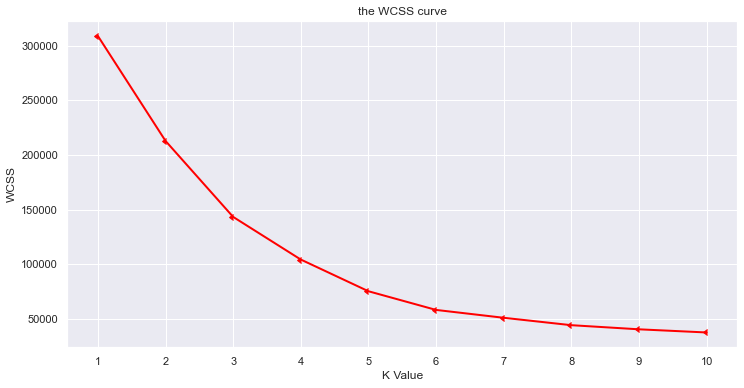

In [33]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11,1),wcss,linewidth=2, color='red', marker=8)
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.title("the WCSS curve")
plt.show()

In [34]:
km2 = KMeans(n_clusters=5)
y1 = km.fit_predict(X1)
df2["label"] = y1
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,7
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


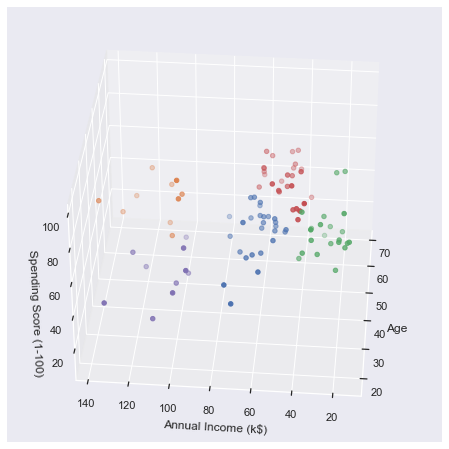

In [35]:
#3D Plot 

fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection = '3d')
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0])
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1])
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2])
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3])
ax.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4])
ax.view_init(35,185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()

In [36]:
C1 = df2[df2["label"] == 1]
print("Number of customer in 1st group=", len(C1))
print("They are -", C1["CustomerID"].values)
print("---------------------------------------------------------------------------------------------")

C2 = df2[df2["label"] == 0]
print("Number of customer in 2nd group=", len(C2))
print("They are -", C1["CustomerID"].values)
print("---------------------------------------------------------------------------------------------")

C3 = df2[df2["label"] == 2]
print("Number of customer in 1st group=", len(C3))
print("They are -", C3["CustomerID"].values)
print("---------------------------------------------------------------------------------------------")

C4 = df2[df2["label"] == 3]
print("Number of customer in 1st group=", len(C4))
print("They are -", C4["CustomerID"].values)
print("---------------------------------------------------------------------------------------------")

C5 = df2[df2["label"] == 4]
print("Number of customer in 1st group=", len(C4))
print("They are -", C4["CustomerID"].values)
print("---------------------------------------------------------------------------------------------")

Number of customer in 1st group= 10
They are - [182 184 186 188 190 192 194 196 198 200]
---------------------------------------------------------------------------------------------
Number of customer in 2nd group= 27
They are - [182 184 186 188 190 192 194 196 198 200]
---------------------------------------------------------------------------------------------
Number of customer in 1st group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
---------------------------------------------------------------------------------------------
Number of customer in 1st group= 27
They are - [ 41  47  51  54  55  57  58  60  61  63  64  65  68  71  73  74  75  81
  83  87  91 103 107 109 110 111 117]
---------------------------------------------------------------------------------------------
Number of customer in 1st group= 27
They are - [ 41  47  51  54  55  57  58  60  61  63  64  65  68  71  73  74  75  81
  83  87  91 103 107 109 110 111 117]
---------------